In [1]:
import os
import torch
import torchvision
import torch.nn as nn
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from PIL import Image

In [2]:
model = torchvision.models.quantization.mobilenet_v3_large(weights=torchvision.models.quantization.MobileNet_V3_Large_QuantizedWeights.IMAGENET1K_QNNPACK_V1, quantize=True)
def print_model_size(mdl):
    torch.save(mdl.state_dict(), "tmp.pt")
    print("Model Size: %.2f MB" %(os.path.getsize("tmp.pt")/1e6))
    os.remove('tmp.pt')
print('-'*40)
print('Original Model')
print_model_size(model)
print('-'*40)
print(model)
print('-'*40)

----------------------------------------
Original Model
Model Size: 5.63 MB
----------------------------------------
QuantizableMobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): QuantizedConv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), scale=0.5188275575637817, zero_point=123, padding=(1, 1))
      (1): Identity()
      (2): QuantizedHardswish()
    )
    (1): QuantizableInvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): QuantizedConvReLU2d(16, 16, kernel_size=(3, 3), stride=(1, 1), scale=0.05623207986354828, zero_point=0, padding=(1, 1), groups=16)
          (1): Identity()
          (2): Identity()
        )
        (1): Conv2dNormActivation(
          (0): QuantizedConv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), scale=0.2755914330482483, zero_point=149)
          (1): Identity()
        )
      )
      (skip_add): QFunctional(
        scale=0.2736288607120514, zero_point=65
        (activation_post_process)

e:\Software\Miniconda\envs\torch2-gpu\lib\site-packages\torch\ao\quantization\utils.py:310: UserWarning: must run observer before calling calculate_qparams. Returning default values.
  warnings.warn(


In [3]:
model.classifier = nn.Sequential(
    model.classifier[0],
    model.classifier[1]
)
print('-'*40)
print('Model as Feature Extractor')
print_model_size(model)
print('-'*40)
print(model)

----------------------------------------
Model as Feature Extractor
Model Size: 4.34 MB
----------------------------------------
QuantizableMobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): QuantizedConv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), scale=0.5188275575637817, zero_point=123, padding=(1, 1))
      (1): Identity()
      (2): QuantizedHardswish()
    )
    (1): QuantizableInvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): QuantizedConvReLU2d(16, 16, kernel_size=(3, 3), stride=(1, 1), scale=0.05623207986354828, zero_point=0, padding=(1, 1), groups=16)
          (1): Identity()
          (2): Identity()
        )
        (1): Conv2dNormActivation(
          (0): QuantizedConv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), scale=0.2755914330482483, zero_point=149)
          (1): Identity()
        )
      )
      (skip_add): QFunctional(
        scale=0.2736288607120514, zero_point=65
        (activation_p

In [4]:
# Test the model with random data
x = torch.randn(100, 3, 224, 224)

since = time.time()
y = model(x)
print('-'*40)
print(f'Time Consumed: {time.time() - since:.2f}s')
print(f'Speed: {len(y)/(time.time() - since):4.0f} imgs/sec')
print('-'*40)
print('y=', y, y.shape)

----------------------------------------
Time Consumed: 0.82s
Speed:  123 imgs/sec
----------------------------------------
y= tensor([[ 0.3021, -0.3525,  0.0755,  ..., -0.3273, -0.3776,  0.9567],
        [ 0.3273, -0.3776,  0.1259,  ..., -0.2769, -0.3525,  0.6294],
        [ 0.0755, -0.3525,  0.1259,  ..., -0.2769, -0.3776,  0.7805],
        ...,
        [ 0.4280, -0.3021,  0.0252,  ..., -0.2014, -0.3776,  0.6294],
        [ 0.4280, -0.3525,  0.0252,  ..., -0.2518, -0.3776,  1.0071],
        [ 0.1259, -0.3776, -0.1007,  ..., -0.2266, -0.3776,  0.7301]]) torch.Size([100, 1280])


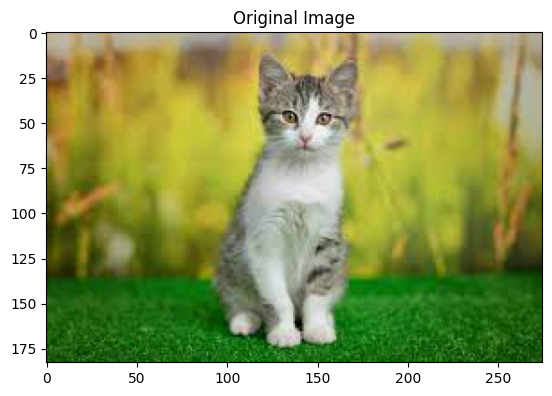

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


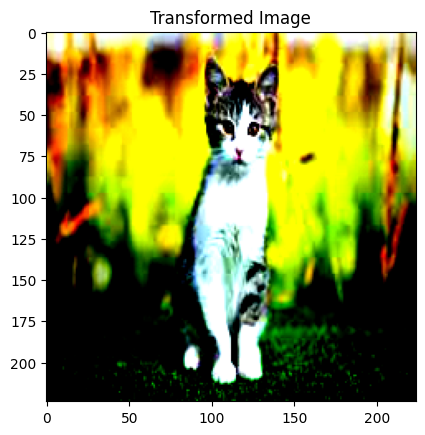

Input Tensor:  tensor([[[ 1.1529,  1.1358,  1.1358,  ...,  0.9303,  0.9474,  0.9474],
         [ 1.1358,  1.1358,  1.1358,  ...,  0.9303,  0.9474,  0.9474],
         [ 1.1187,  1.1187,  1.1187,  ...,  0.9132,  0.9474,  0.9474],
         ...,
         [-1.7240, -1.5870, -1.6898,  ..., -1.6898, -1.6042, -1.4672],
         [-1.8097, -1.6555, -1.7754,  ..., -1.5528, -1.5528, -1.4158],
         [-1.6727, -1.5870, -1.7925,  ..., -1.4843, -1.6384, -1.6213]],

        [[ 1.0280,  1.0455,  1.0805,  ...,  0.9930,  0.9755,  0.9755],
         [ 1.0280,  1.0630,  1.0980,  ...,  0.9930,  0.9755,  0.9755],
         [ 1.0105,  1.0455,  1.0805,  ...,  0.9755,  0.9580,  0.9580],
         ...,
         [-0.5651, -0.4251, -0.5301,  ..., -0.5651, -0.4776, -0.3200],
         [-0.6527, -0.4951, -0.6176,  ..., -0.4251, -0.4426, -0.3025],
         [-0.5126, -0.4251, -0.6352,  ..., -0.3550, -0.5301, -0.5126]],

        [[ 0.8099,  0.7925,  0.7576,  ...,  0.8797,  0.8622,  0.8622],
         [ 0.8274,  0.7925,  0

In [5]:
# Test the model with real image
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

image = Image.open('Data/Test/cat.jpg')
plt.figure()
plt.imshow(image)
plt.title('Original Image')
plt.show()

img_tensor = transform(image)
plt.figure()
plt.imshow(img_tensor.permute(1, 2, 0).numpy())
plt.title('Transformed Image')
plt.show()
print('Input Tensor: ', img_tensor, img_tensor.shape)

x = img_tensor.unsqueeze(0)
y = model(x)
print('Feature Vector: ', y, y.shape)

In [6]:
def get_images_info(root):
    images_info = []
    for subdir, _, files in os.walk(root):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):
                file_path = os.path.join(subdir, file)
                file_size = os.path.getsize(file_path)
                file_ext = os.path.splitext(file_path)[-1]
                images_info.append((file_path, file, file_size, file_ext, subdir))
    return images_info

df = pd.DataFrame(get_images_info('./Data/Labels/'), columns=['file_path', 'file', 'file_size', 'file_ext', 'folder'])
df.set_index('file_path', inplace=True)
df

,file,file_size,file_ext,folder
file_path,,,,
./Data/Labels/Bird\Bird1.jpg,Bird1.jpg,20874,.jpg,./Data/Labels/Bird
./Data/Labels/Bird\Bird2.jpg,Bird2.jpg,25603,.jpg,./Data/Labels/Bird
./Data/Labels/Bird\Bird3.jpg,Bird3.jpg,17664,.jpg,./Data/Labels/Bird
./Data/Labels/Bird\Bird4.jpg,Bird4.jpg,23363,.jpg,./Data/Labels/Bird
./Data/Labels/Bird\Bird5.jpg,Bird5.jpg,30184,.jpg,./Data/Labels/Bird
./Data/Labels/Cat\Cat1.jpg,Cat1.jpg,7010,.jpg,./Data/Labels/Cat
./Data/Labels/Cat\Cat2.jpg,Cat2.jpg,10647,.jpg,./Data/Labels/Cat
./Data/Labels/Cat\Cat3.jpg,Cat3.jpg,7326,.jpg,./Data/Labels/Cat
./Data/Labels/Cat\Cat4.jpg,Cat4.jpg,8330,.jpg,./Data/Labels/Cat


In [7]:
print(df.groupby('folder').size())

folder
./Data/Labels/Bird    5
./Data/Labels/Cat     5
./Data/Labels/Dog     5
dtype: int64


In [8]:
feature_vec = []
for i, img in enumerate(df.index):
    img = Image.open(img)
    x = transform(img).unsqueeze(0)
    vec = model(x).squeeze(0).numpy()
    feature_vec.append(vec)
df['feature_vec'] = feature_vec
df

,file,file_size,file_ext,folder,feature_vec
file_path,,,,,
./Data/Labels/Bird\Bird1.jpg,Bird1.jpg,20874,.jpg,./Data/Labels/Bird,"[0.100705735, -0.35247007, 0.100705735, -0.100..."
./Data/Labels/Bird\Bird2.jpg,Bird2.jpg,25603,.jpg,./Data/Labels/Bird,"[0.17623504, -0.25176433, -0.1510586, -0.30211..."
./Data/Labels/Bird\Bird3.jpg,Bird3.jpg,17664,.jpg,./Data/Labels/Bird,"[-0.35247007, 0.0, -0.025176434, -0.20141147, ..."
./Data/Labels/Bird\Bird4.jpg,Bird4.jpg,23363,.jpg,./Data/Labels/Bird,"[0.47835225, -0.3776465, 0.0755293, -0.2014114..."
./Data/Labels/Bird\Bird5.jpg,Bird5.jpg,30184,.jpg,./Data/Labels/Bird,"[-0.100705735, 0.579058, 1.334351, -0.32729363..."
./Data/Labels/Cat\Cat1.jpg,Cat1.jpg,7010,.jpg,./Data/Labels/Cat,"[-0.100705735, -0.32729363, -0.27694076, -0.10..."
./Data/Labels/Cat\Cat2.jpg,Cat2.jpg,10647,.jpg,./Data/Labels/Cat,"[2.2407026, 0.100705735, -0.3776465, -0.377646..."
./Data/Labels/Cat\Cat3.jpg,Cat3.jpg,7326,.jpg,./Data/Labels/Cat,"[-0.100705735, -0.3776465, -0.3021172, -0.3776..."
./Data/Labels/Cat\Cat4.jpg,Cat4.jpg,8330,.jpg,./Data/Labels/Cat,"[-0.17623504, -0.20141147, -0.32729363, -0.125..."


In [9]:
# Save the index to a pickle file
df.to_pickle('AutoLabelIndex.pkl')

# Read it back
# df = pd.read_pickle('AutoLabelIndex.pkl')
# df

In [10]:
# Get the feature matrix
feature_vec = df['feature_vec'].to_numpy()
feature_vec_tensor = torch.stack([torch.from_numpy(x) for x in feature_vec])
print(feature_vec_tensor, feature_vec_tensor.shape)

tensor([[ 0.1007, -0.3525,  0.1007,  ...,  0.1007,  3.9275,  0.0000],
        [ 0.1762, -0.2518, -0.1511,  ..., -0.2769,  2.3162,  0.0000],
        [-0.3525,  0.0000, -0.0252,  ..., -0.0504,  1.6868,  0.0000],
        ...,
        [ 0.2014, -0.3776, -0.3021,  ...,  1.6868, -0.3525, -0.3776],
        [ 1.2588, -0.2014, -0.1007,  ..., -0.3776, -0.1007, -0.1762],
        [ 1.1329,  0.3273, -0.1259,  ..., -0.3525, -0.3776,  0.0000]]) torch.Size([15, 1280])


[[ 13.97777452  -0.63992785]
 [ 16.30258517   2.40058635]
 [ 17.59496853   2.76871997]
 [ 18.22249772  -2.8424926 ]
 [ 20.48187622   1.41413218]
 [ -8.10833939 -11.80435067]
 [ -9.13139698 -11.40395307]
 [ -7.66328657  -6.74831288]
 [ -7.70228364 -14.27199389]
 [ -6.69278013  -6.39443065]
 [ -8.80864683   1.42985879]
 [-10.14240165  11.55454567]
 [ -9.8427482   15.2601378 ]
 [-10.03521416  11.01101907]
 [ -8.45260461   8.26646178]] (15, 2)


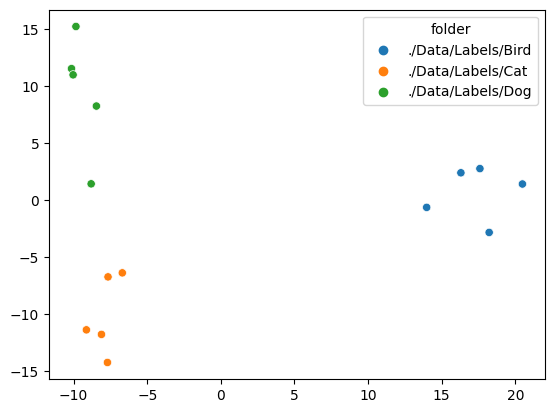

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(feature_vec_tensor)
projected_feature_vec_tensor = pca.transform(feature_vec_tensor)
print(projected_feature_vec_tensor, projected_feature_vec_tensor.shape)

sns.scatterplot(x=projected_feature_vec_tensor[:,0], y=projected_feature_vec_tensor[:,1], hue=df['folder'])
plt.show()

In [12]:
print(f'We have new feature vec y: {y}, {y.shape}')
print(f'And the index feature matrix feature_vec_tensor with shape of: {feature_vec_tensor.shape}')

# cos(theta) = (x dot y) / (|x| * |y|)
cosine_distance = feature_vec_tensor @ y.T
cosine_distance_norm = cosine_distance / (torch.norm(feature_vec_tensor, dim=1) * torch.norm(y, dim=1)).reshape(-1, 1)
print(f'The normalized cosine distance is: {cosine_distance_norm.T}')
max_cosine_distance, max_cosine_distance_index = torch.max(cosine_distance_norm, dim=0)
print(f'The max cosine distance is: {max_cosine_distance} at index: {max_cosine_distance_index}')

label = df['folder'][max_cosine_distance_index.item()]
print(f'The label is: {label}')

We have new feature vec y: tensor([[-0.0504,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]), torch.Size([1, 1280])
And the index feature matrix feature_vec_tensor with shape of: torch.Size([15, 1280])
The normalized cosine distance is: tensor([[0.0866, 0.0439, 0.0951, 0.0873, 0.0552, 0.4116, 0.3086, 0.2782, 0.3607,
         0.2303, 0.1718, 0.1066, 0.1141, 0.0891, 0.1950]])
The max cosine distance is: tensor([0.4116]) at index: tensor([5])
The label is: ./Data/Labels/Cat


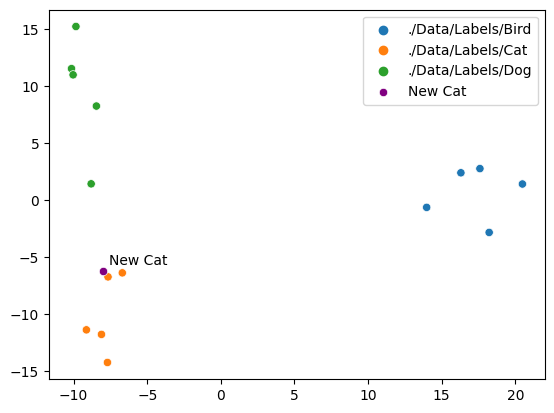

In [24]:
sns.scatterplot(x=projected_feature_vec_tensor[:,0], y=projected_feature_vec_tensor[:,1], hue=df['folder'])
projected_y = pca.transform(y)
sns.scatterplot(x=projected_y[:,0], y=projected_y[:,1], color='purple', label='New Cat')
plt.annotate('New Cat', xy=(projected_y[0,0], projected_y[0,1]), xytext=(5, 5), textcoords='offset points')
plt.show()